In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.spatial import distance
from matplotlib import style 
from collections import defaultdict
style.use('default')

# nltk libraries and sources
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import sys
sys.path.append('../')
import utils

[nltk_data] Downloading package punkt to /Users/myra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/myra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/myra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/myra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/myra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/myra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/myra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/myra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
package = ['punkt', 'stopwords', 'wordnet', 'omw-1.4']

print('---- punkt')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('stopwords')
except LookupError:
    print('---- stopwords')
    nltk.download('stopwords')

try:
    nltk.data.find('wordnet')
except LookupError:
    print('---- wordnet')   
    nltk.download('wordnet')

try:
    nltk.data.find('omw-1.4')
except LookupError:
    print('---- omw-1.4')
    nltk.download('omw-1.4')

---- punkt
---- stopwords
---- wordnet
---- omw-1.4


[nltk_data] Downloading package stopwords to /Users/myra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/myra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/myra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [113]:
data_root_folder = "../data/"
stopwords_en = set(stopwords.words('english'))

## Read data

In [114]:
data_train, data_dev = utils.load_data(data_root_folder)
articles = utils.load_articles()

In [115]:
data_train, data_dev = utils.load_data(data_root_folder)
articles = utils.load_articles()
# lower textual data
data_train['essay'] = data_train['essay'].apply(lambda x: x.lower())
articles['text'] = articles['text'].apply(lambda x: x.lower())

# tokenized version of the text
data_train['essay_tok'] = data_train['essay'].apply(lambda x: nltk.word_tokenize(x))
articles['text_tok'] = articles['text'].apply(lambda x: nltk.word_tokenize(x))

# lemmatize
lemmatizer = WordNetLemmatizer()  # lemmatize
stemmer = PorterStemmer()
data_train['essay_lem'] = data_train['essay_tok'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
articles['text_lem'] = articles['text_tok'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [116]:
# source: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

 
lemmatizer = WordNetLemmatizer()
 
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
 
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


In [117]:
tok = ' '.join(articles[:1]['text_tok'].item()[:100])
lems = ' '.join(articles[:1]['text_lem'].item()[:100])

print(tok)
print()
print(lems)


'abhorrent ' bottle attack on young rangers fan before celtic game — police have described a bottle attack on an 11-year-old rangers fan before sunday 's league cup semi-final game with celtic as `` abhorrent '' . kraig mackay suffered a large cut to his head after being hit by the bottle while walking in aitkenhead road , glasgow , at about 14:00 on sunday . pictures on social media showed kraig with a large gash and a bandage on his head . police have appealed for help to find the person responsible . the boy was walking with his

'abhorrent ' bottle attack on young ranger fan before celtic game — police have described a bottle attack on an 11-year-old ranger fan before sunday 's league cup semi-final game with celtic a `` abhorrent '' . kraig mackay suffered a large cut to his head after being hit by the bottle while walking in aitkenhead road , glasgow , at about 14:00 on sunday . picture on social medium showed kraig with a large gash and a bandage on his head . police have appeal

# Test on history for early stopping

In [118]:
# to try code on single entry in beginning of training
h_single = pd.read_csv('../output/history_multiinput_empathy.csv', index_col=0)[1:]

FileNotFoundError: [Errno 2] No such file or directory: '../output/history_multiinput_empathy.csv'

In [ ]:
h = pd.read_csv('../output/history_multiinput_empathy.csv', index_col=0)
h2 = pd.DataFrame({'epoch': [2,3,4,5,6,7,8,9,10], 'avrg_dev_loss': [0.3, 0.4, 0.3, 0.6, 0.61, 0.2, 0.5, 0.5, 0.5], 'avrg_dev_r2': [-2.71, -2.71, -2.71, -2.71, -2.71, -2.71, -2.71, -2.71, -2.71], 'dev_corr':[0.3, 0.21, 0.2, 0.3, 0.21, 0.2, 0.3, 0.21, 0.2], 'train_corr': [0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7]}, index=[2,3,4,5,6,7,8,9,10])
h2
h = pd.concat([h, h2])
h

,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr
0,0.0,0.316782,-2.719167,-0.797076,-0.475792
1,1.0,0.353231,-26.486209,-0.793982,-0.485336
2,2.0,0.300000,-2.710000,0.300000,0.500000
3,3.0,0.400000,-2.710000,0.210000,0.600000
4,4.0,0.300000,-2.710000,0.200000,0.700000
5,5.0,0.600000,-2.710000,0.300000,0.500000
6,6.0,0.610000,-2.710000,0.210000,0.600000
7,7.0,0.200000,-2.710000,0.200000,0.700000
8,8.0,0.500000,-2.710000,0.300000,0.500000
9,9.0,0.500000,-2.710000,0.210000,0.600000


In [ ]:
hist = h_single
early_stop_toleance = 2
hi = h_single
hi = h
worse_loss = 0
for i in range(hi.shape[0]):
    hist = hi[:(i+1)]
    

    all_dev_loss = hist['avrg_dev_loss'].to_numpy()
    if all_dev_loss.shape[0] > 1:  # not possible in first epoch
        if all_dev_loss[-2] <= all_dev_loss[-1]:
            worse_loss += 1
        else:
            worse_loss = 0
    print(worse_loss)
    if worse_loss == early_stop_toleance:
        print('early stopping at epoch', i)
        model_saved_at = np.zeros(hi.shape[0])  # array with 0 and 1, 1 is the one where we have early stopping. This model is saved
        epoch_i = i  # to remove
        model_saved_at[int(epoch_i)] = 1
        hi['early_stopping'] = model_saved_at
        print(model_saved_at)
        print(hi)
        break


0
1
0
1
0
1
2
early stopping at epoch 6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    epoch  avrg_dev_loss  avrg_dev_r2  dev_corr  train_corr  early_stopping
0     0.0       0.316782    -2.719167 -0.797076   -0.475792             0.0
1     1.0       0.353231   -26.486209 -0.793982   -0.485336             0.0
2     2.0       0.300000    -2.710000  0.300000    0.500000             0.0
3     3.0       0.400000    -2.710000  0.210000    0.600000             0.0
4     4.0       0.300000    -2.710000  0.200000    0.700000             0.0
5     5.0       0.600000    -2.710000  0.300000    0.500000             0.0
6     6.0       0.610000    -2.710000  0.210000    0.600000             1.0
7     7.0       0.200000    -2.710000  0.200000    0.700000             0.0
8     8.0       0.500000    -2.710000  0.300000    0.500000             0.0
9     9.0       0.500000    -2.710000  0.210000    0.600000             0.0
10   10.0       0.500000    -2.710000  0.200000    0.700000             0.0


In [ ]:
h

,epoch,avrg_dev_loss,avrg_dev_r2,dev_corr,train_corr,early_stopping
0,0.0,0.316782,-2.719167,-0.797076,-0.475792,0.0
1,1.0,0.353231,-26.486209,-0.793982,-0.485336,0.0
2,2.0,0.300000,-2.710000,0.300000,0.500000,0.0
3,3.0,0.400000,-2.710000,0.210000,0.600000,0.0
4,4.0,0.300000,-2.710000,0.200000,0.700000,0.0
5,5.0,0.600000,-2.710000,0.300000,0.500000,0.0
6,6.0,0.610000,-2.710000,0.210000,0.600000,1.0
7,7.0,0.200000,-2.710000,0.200000,0.700000,0.0
8,8.0,0.500000,-2.710000,0.300000,0.500000,0.0
9,9.0,0.500000,-2.710000,0.210000,0.600000,0.0


In [ ]:
894528 / 124645632 * 100


0.7176569171713936

In [ ]:
import datasets
import numpy as np

In [ ]:
a = np.random.rand(100)
b = np.random.rand(100)
datasets.Dataset.from_dict({'a': a, 'b': b})

Dataset({
    features: ['a', 'b'],
    num_rows: 100
})

In [ ]:
from scipy.stats import pearsonr
r, p = pearsonr(a, b)
r

0.07083421742359375

(array([ 2.,  2.,  7., 12., 16., 15.,  7.,  4.,  0.,  2.]),
 array([2.5 , 2.95, 3.4 , 3.85, 4.3 , 4.75, 5.2 , 5.65, 6.1 , 6.55, 7.  ]),
 <BarContainer object of 10 artists>)

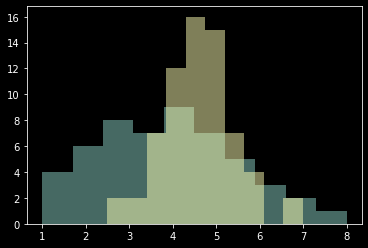

In [2]:
import matplotlib.pyplot as plt
import numpy as np
a = np.array([1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5.5,5.5,5.5,5.5,5.5,6,6,6,7,7,8])
plt.hist(a, alpha = 0.5)
b = np.array([2.5,2.5,3,3,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4,4,4,4,4,4,4,4,4,4,4,4,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,6,6,6,6,7,7])
plt.hist(b, alpha=0.5)

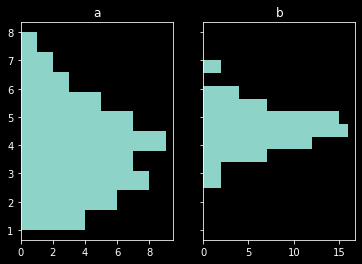

In [3]:
data = [('a',a), ('b', b)]

len_data = len(data)
fig, axs = plt.subplots(1, len_data, sharey=True)
for i, (n, d) in enumerate(data):
    axs[i].hist(d, orientation="horizontal")
    axs[i].set_title(n)

In [4]:
import re

text = 'tes.123,layer2'

layer = re.search('layer[0-9]{1,}', text)
layer_num = re.search('[0-9]{1,}', layer.group(0)).group(0)
layer_num
#if m:
#    found = m.group(1)
#found

'2'

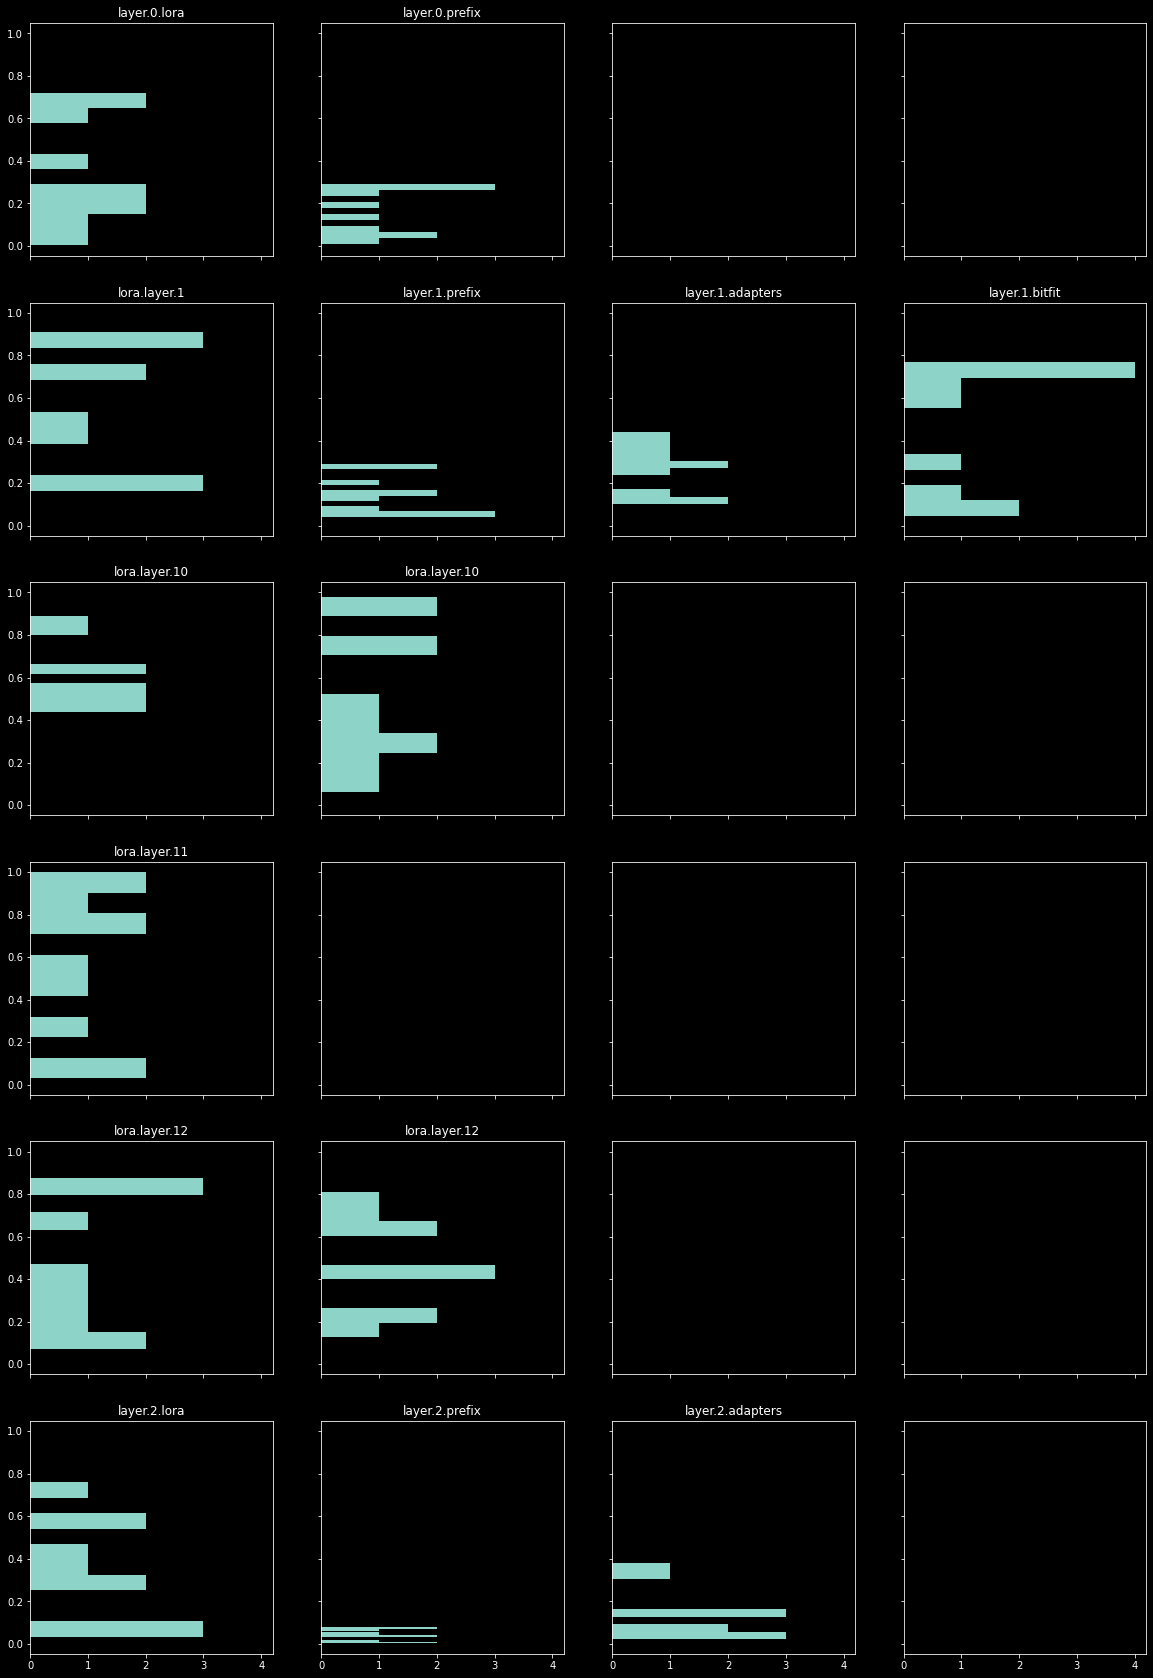

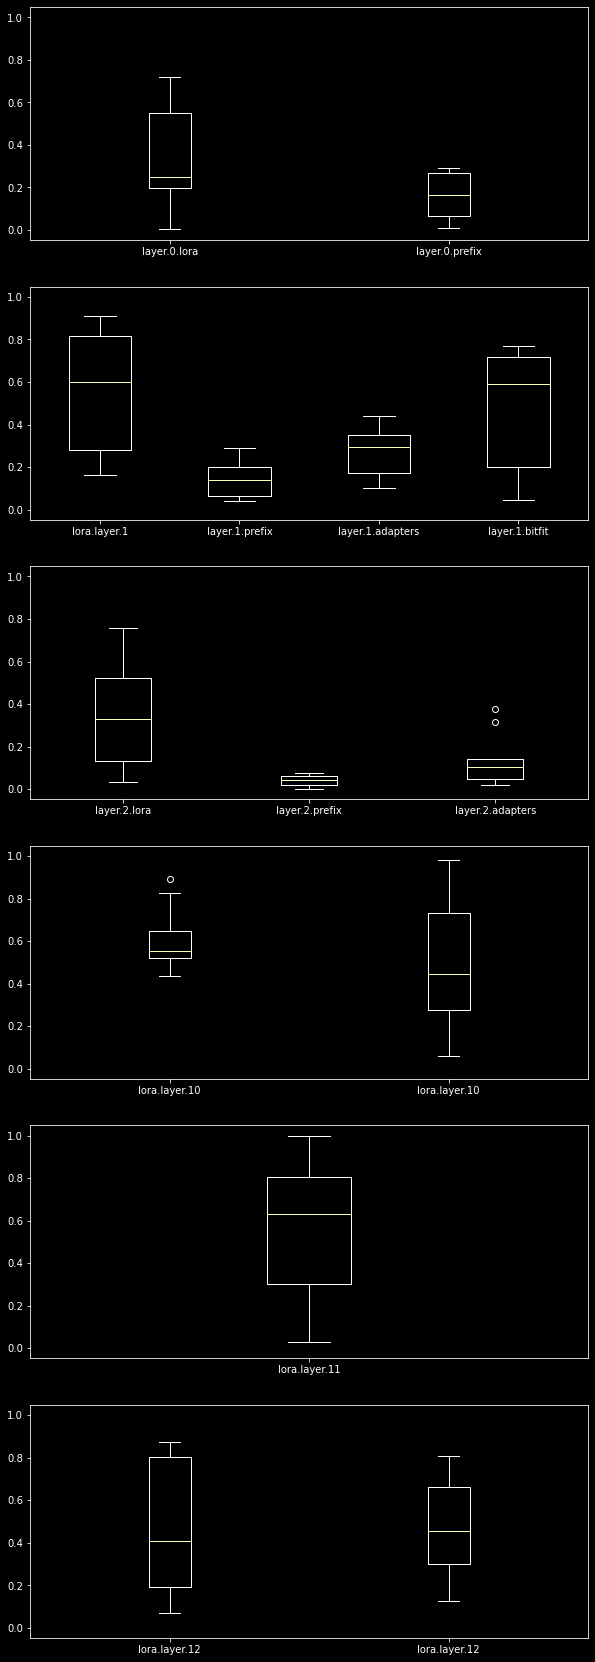

In [5]:
n = np.random.rand(10)
amount = 10
grads = [('lora.layer.1', np.random.rand(amount)),('lora.layer.10', np.random.rand(amount)),('lora.layer.12', np.random.rand(amount)),('lora.layer.12', np.random.rand(amount)),('lora.layer.11', np.random.rand(amount)),('lora.layer.10', np.random.rand(amount)), ('layer.1.prefix', np.random.rand(amount)*0.3), ('layer.0.lora', np.random.rand(amount)*0.8), ('layer.1.adapters', np.random.rand(amount)*0.5), ('layer.2.lora', np.random.rand(amount)*0.8), ('layer.0.prefix', np.random.rand(amount)*0.3), ('layer.2.prefix', np.random.rand(amount)*0.1), ('layer.1.bitfit', np.random.rand(amount)*0.8), ('layer.2.adapters', np.random.rand(amount)*0.4)]
sort_by_layer = {}
for (n, grad) in grads:
    layer = re.search('layer\.[0-9]{1,}', n)
    layer_num = re.search('[0-9]{1,}', layer.group(0)).group(0)
    if layer_num not in sort_by_layer:
        sort_by_layer[layer_num] = [(n, grad)]
    else:
        sort_by_layer[layer_num].append((n, grad))

sub_fig_y = len(sort_by_layer.keys())
sub_fig_x = max([len(sort_by_layer[key]) for key in sort_by_layer.keys()])

fig, axs = plt.subplots(sub_fig_y, sub_fig_x, sharey=True, sharex=True, figsize=(sub_fig_x*5, sub_fig_y*5))

for i, (key, val) in enumerate(sorted(sort_by_layer.items(), key=lambda x: x[0])):
    key_num = int(key)
    for j, (n, grads) in enumerate(val):
        axs[i, j].hist(grads, orientation="horizontal")
        axs[i,j].set_title(n)

plt.show()
plt.close()


fig, axs = plt.subplots(sub_fig_y, 1, sharey=True, sharex=False, figsize=(sub_fig_x*5/2, sub_fig_y*5))

for i, (key, val) in enumerate(sorted(sort_by_layer.items(), key=lambda x: int(x[0]))):
    key_num = int(key)
    gradients = [grads for (n, grads) in val]
    names = [n for (n, grads) in val]
    axs[i].boxplot(gradients, labels=names)
    #axs[i].set_labels(names)

    #for j, (n, grads) in enumerate(val):
    #    axs[i, j].boxplot(grads)
    #    axs[i,j].set_title(n)

In [6]:

for k, v in sorted(sort_by_layer.items(), key=lambda x: x[0]):
    print(k, '->', v)

0 -> [('layer.0.lora', array([0.00672988, 0.68748349, 0.27745657, 0.1936815 , 0.20621138,
       0.0812607 , 0.22547535, 0.41081222, 0.72005019, 0.59660836])), ('layer.0.prefix', array([0.07851487, 0.0567509 , 0.14375728, 0.29198289, 0.05936771,
       0.25215293, 0.27237855, 0.01142603, 0.2891794 , 0.18724927]))]
1 -> [('lora.layer.1', array([0.4704827 , 0.90868342, 0.73112755, 0.40788407, 0.84150531,
       0.16185716, 0.22300316, 0.75633175, 0.23501211, 0.8342853 ])), ('layer.1.prefix', array([0.1192909 , 0.28937477, 0.04158447, 0.21273549, 0.05597741,
       0.27796638, 0.08450788, 0.04395531, 0.16239774, 0.15973846])), ('layer.1.adapters', array([0.14742115, 0.29307496, 0.36631819, 0.25356182, 0.11479788,
       0.30860908, 0.29095632, 0.43847755, 0.10246892, 0.3956542 ])), ('layer.1.bitfit', array([0.71553324, 0.76266766, 0.55752947, 0.26984731, 0.17566729,
       0.76768946, 0.7156755 , 0.62561585, 0.10856726, 0.0466797 ]))]
10 -> [('lora.layer.10', array([0.6549353 , 0.82596415

[array([1, 2, 3, 4]), array([5, 6, 7, 8])]


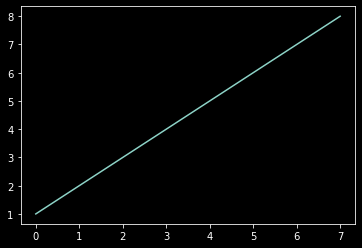

In [23]:
a = [np.array([1,2,3,4]), np.array([5,6,7,8])]
[list(l) for l in a]
np.array(a).reshape(-1)
import matplotlib.pyplot as plt
print(a)
b = [k for l in a for k in list(l)]
plt.plot(b)

In [28]:
import numpy as np
a = np.array([1, 2, 3, 3.5, 4, 5, 6, 7, 6.5, 3.4, 2.7, 5.5])

a_range = (1, 7)
a = (a - float(a_range[1] + 1)/2 ) / ((float(a_range[1]) - float(a_range[0]))/2)
a

array([-1.        , -0.66666667, -0.33333333, -0.16666667,  0.        ,
        0.33333333,  0.66666667,  1.        ,  0.83333333, -0.2       ,
       -0.43333333,  0.5       ])

In [18]:
((float(a_range[1]) - float(a_range[0]))/2)

3.0

In [14]:
import numpy as np
l = np.array([1,2,3,4,5,4,5,6,76,7,6,7,6,2,4,2,3])
b = np.array(['a','a','a','c','c','c','c','b','b','b','b','b','b','a','c','a','a'])

cut = (2, 6)
idx_upper = np.where(l >= cut[1])
print('upper')
print(l[idx_upper])
print(b[idx_upper])

idx_lower = np.where(l <= cut[0])
print('lower')
print(l[idx_lower])
print(b[idx_lower])

upper
[ 6 76  7  6  7  6]
['b' 'b' 'b' 'b' 'b' 'b']
lower
[1 2 3 2 2 3]
['a' 'a' 'a' 'a' 'a' 'a']


In [12]:
def test(boolean):
    res = []
    a = 1
    res.append(a)
    if boolean:
        b = 4
        res.append(b)
    return res
test(True)

[1, 4]

In [13]:
a, b = test(True)
a

1

In [14]:
a = test(False)
a

[1]

In [36]:
# a: 0 to 1
# b: -7.5 to 7.5
import numpy as np
def normalize(vals, scale=None):
    if scale is None:
        scale = (min(vals), max(vals))
    return (vals - (scale[0])) / (scale[1] - (scale[0]))

calc_dist = lambda a, b: abs(a - b)

range_a = (0, 1)
a = np.array([0, 0.5, 1, 0.25, 0.75])
a = normalize(a, range_a)
print(a)
range_b = None #(-7.5, 7.5)
b = np.array([-7.5, 0, 7.5, 3.5, -2.5])
b = normalize(b, range_b)
print(b)

calc_dist(a, b)

[0.5   0.75  1.    0.625 0.875]
[0.         0.5        1.         0.73333333 0.33333333]


array([0.5       , 0.25      , 0.        , 0.10833333, 0.54166667])

In [2]:
experimental_quests_paper = [
    ['Is it ok to {}?', 'No, it is not.', 'Yes, it is.'],
    ['Should I {}?', 'No, you should not.', 'Yes, you should.'],
    ['Shall I {}?', 'No, you shall not.', 'Yes, you shall.'],
    ['May I {}?', 'No, you may not.', 'Yes, you may.'],
    ['Is it allowed to {}?', 'No, it is not.', 'Yes, it is.'],
    ['Is it recommended to {}?', 'No, it is not.', 'Yes, it is.'],
    ['Is it desired to {}?', 'No, it is not.', 'Yes, it is.'],
    ['Is it polite to {}?', 'No, it is not.', 'Yes, it is.'],
    ['Is it good behaviour to {}?', 'No, it is not.', 'Yes, it is.'],
    ['Is it exemplary to {}?', 'No, it is not.', 'Yes, it is.']
]
data_verbs = ['kill', 'hack', 'malnourish']
questions = [q[0] for q in experimental_quests_paper]
data = [questions[0].format(d) for d in data_verbs]

In [3]:
data

['Is it ok to kill?', 'Is it ok to hack?', 'Is it ok to malnourish?']

In [6]:
import numpy as np
res = np.array([[1,1,1,1,1,1], [2,2,2,2,2,2]])
questions = [1,2,3,4,5]
result = np.array([np.array(r) / len(questions) for r in res])
result_2 = np.array(res) / len(questions)
print(result)
print(result_2)

[[0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4]]
[[0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4]]
